In [ ]:
system_prompt = """
You are an advanced classifying AI. Your task is to classify the sentiment of a text. Sentiment can be either ‘positive’, ‘negative’, or ‘neutral’.
**Examples:**
"Wir sind EIN Volk! 🇩🇪 In Leipzig nahm es den Anfang, breitete sich aus wie ein Lauffeuer und ebnete den Weg für die deutsche Einheit. Was damals viel Arbeit war, zahlte sich aus. Was heute noch Arbeit ist, wird sich auszahlen. Ein geeintes Deutschland ist keine Selbstverständlichkeit und wir sind dankbar für die Demokratie, den Rechtsstaat und unsere freiheitliche Gesellschaft. Und wir arbeiten täglich dafür, dass uns diese Werte erhalten bleiben.": positive
"FREIE WÄHLER Wir FREIE WÄHLER kämpfen für eine flächendeckende Gesundheitsversorgung auch auf dem Land. HUBERT AJUANGER": neutral
"Die #Grünen sind mit dafür verantwortlich, dass die #Ampel-Regierung in Berlin meilenweit an der Lebenswirklichkeit der Menschen vorbei regiert. Ausgerechnet unter einem grünen Klimaminister lässt die Akzeptanz für #Klimaschutz in der Gesellschaft nach. Mit uns wird es keine Grünen in der Bayerischen Staatsregierung geben.": negative
"""

In [ ]:
prompt = """
Please classify the following social media comment into either ‘negative’, ‘neutral’, or ‘positive’. Your answer MUST be one of [‘negative’, ‘neutral’, ‘positive’], and it should be presented in lowercase.
Text: [TEXT]
"""

#### Run the Few-Shot request.
The following code snippet uses my [gpt-cost-estimator](https://pypi.org/project/gpt-cost-estimator/) package to simulate API requests and calculate a cost estimate. Please run the estimation whne possible to asses the price-tag before sending requests to OpenAI! Make sure `run_request` and `system_prompt` are defined before this block by running the two blocks above (see *Setup for GPT*)!

Fill in the `MOCK`, `RESET_COST`, `COLUMN`, `SAMPLE_SIZE`, and `MODEL` variables as needed (see comments above each variable.)

In [ ]:
from tqdm.auto import tqdm

#@markdown Do you want to mock the OpenAI request (dry run) to calculate the estimated price?
MOCK = False # @param {type: "boolean"}
#@markdown Do you want to reset the cost estimation when running the query?
RESET_COST = True # @param {type: "boolean"}
#@markdown What's the column name to save the results of the data extraction task to?
COLUMN = 'Sentiment' # @param {type: "string"}
#@markdown Do you want to run the request on a smaller sample of the whole data? (Useful for testing). Enter 0 to run on the whole dataset.
SAMPLE_SIZE = 25 # @param {type: "number", min: 0}

#@markdown Which model do you want to use?
MODEL = "gpt-3.5-turbo-0613" # @param ["gpt-3.5-turbo-0613", "gpt-4-1106-preview", "gpt-4-0613"] {allow-input: true}


# Initializing the empty column
if COLUMN not in df.columns:
  df[COLUMN] = None

# Reset Estimates
CostEstimator.reset()
print("Reset Cost Estimation")

filtered_df = df.copy()

# Skip previously annotated rows
filtered_df = filtered_df[pd.isna(filtered_df[COLUMN])]

if SAMPLE_SIZE > 0:
  filtered_df = filtered_df.sample(SAMPLE_SIZE)

for index, row in tqdm(filtered_df.iterrows(), total=len(filtered_df)):
    try:
        p = prompt.replace('[TEXT]', row['Text'])
        response = run_request(system_prompt, p, MODEL, MOCK)

        if not MOCK:
          # Extract the response content
          # Adjust the following line according to the structure of the response
          r = response.choices[0].message.content

          # Update the 'new_df' DataFrame
          df.at[index, COLUMN] = r

    except Exception as e:
        print(f"An error occurred: {e}")
        # Optionally, handle the error (e.g., by logging or by setting a default value)

print()

Reset Cost Estimation


  0%|          | 0/25 [00:00<?, ?it/s]

Cost: $0.0010 | Total: $0.0278


In [ ]:
df[~pd.isna(df['Sentiment'])].sample(5)

,Unnamed: 0,shortcode,Text,Text Type,Policy Issues,Sentiment
1833,1833,CxunhdYNvw3,tanten,OCR,NaN,neutral
2299,2299,CxJAr3Ht7mh,EIN JAHR FEMINISTISCHE REVOLUTION IM IRAN LASS...,OCR,NaN,neutral
369,369,Cx2gzYdIv5d,"Wir gratulieren Sven Schulze, der gestern in M...",Caption,NaN,positive
1886,1886,CxqbrYztMdC,"Berliner Senat; nachdem er rausgefunden hat, d...",OCR,NaN,negative
290,290,Cx7ruIdiOXb,#TagderdeutschenEinheit \n\nUnser #Bayern hat ...,Caption,"['LosvonBerlin', 'Bayernpartei']",negative


In [ ]:
# Save Results
df.to_csv('/content/drive/MyDrive/2023-12-01-Export-Posts-Text-Master.csv')

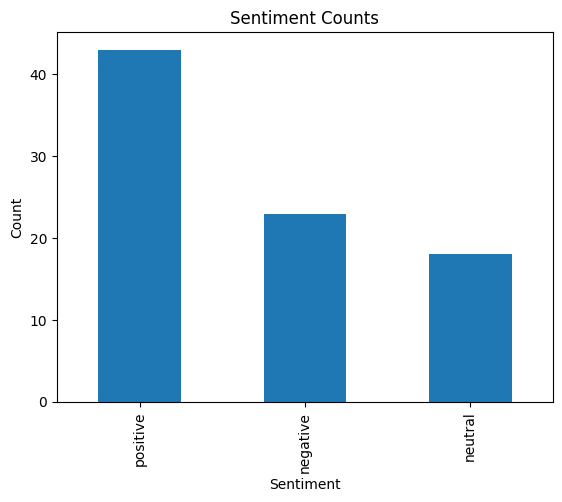

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create a bar chart
sentiment_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts')

# Show the plot
plt.show()